# Minerador de dados

# Sumário

- [Introdução](#Introdução)
- [Problema](#Problema)
- [Implementação](#Implementação)    
- [Experimentos](#Experimentos)
- [Considerações Finais](#Considerações-Finais)

# Introdução

Os diversos bancos de dados existentes nas organizações e empresas podem conter informações valiosas. 

O processo de descoberta de conhecimento em bancos de dados (KDD) faz uso de diversas técnicas e algoritmos para chegar ao seu objetivo.

Este trabalho tem o objetivo de usar a um algoritmo genético para extrair regras de classificação em uma base de dados
   

[Voltar ao Sumário](#Sumário)

# Problema

 
Será utilizado os dados de exemplo iris da biblioteca datasets presente na ferramenta scikit-learn disponível em python.

O objetivo é a extração de regras de classificação dos dados, que possuem três classes alvo (setosa, versicolor e virginica) e 4 atributos.

[Voltar ao Sumário](#Sumário)

# Implementação

A seguir o diagrama de Classe utilizado na implementação do AG:

[Voltar ao Sumário](#Sumário)

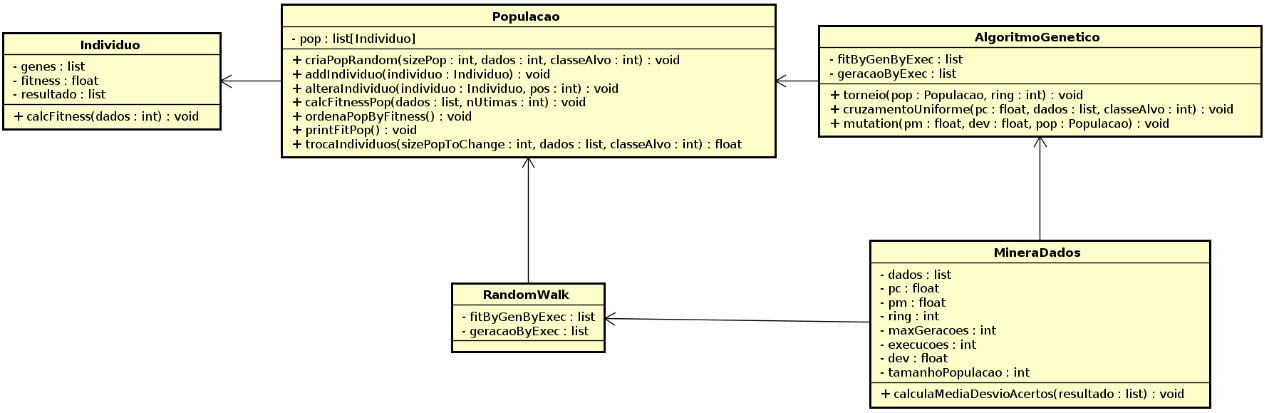

In [12]:
from IPython.display import Image

pathFigure = 'C:///'

Image(filename = pathFigure + '/Classes.png', width=5000) 

A seguir os códigos que implementam as classes definidas:

[Voltar ao Sumário](#Sumário)

In [1]:
#Importações utilizadas
import numpy as np
import numpy.random as npr
from sklearn import datasets
import pandas as pd
import copy
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = (15,8)
import seaborn as sns; sns.set(color_codes=True)

class Individuo():
    
    def __init__(self, dados,classeAlvo):
        self.__genes = []
        self.__resultado = []
        self.__fitness = -1
        
        atributos = list(dados.columns)
        
        for i in range(len(atributos)-1):
            #Sorteando se o atributo será utilizado ou não
            self.__genes.append(npr.rand())
            
            #Sorteando o sinal da comparação <= ou >
            self.__genes.append(npr.rand())
            
            #Sorteando o valor da comparação
            maximo = dados[list(dados.columns)[i]].max()
            minimo = dados[list(dados.columns)[i]].min()
            self.__genes.append(npr.uniform(minimo,maximo))
        
        #Fixando o atributo alvo
        self.__genes.append(1)
        self.__genes.append(0.5)    
        #Sorteando o valor da classe
        #self.__genes.append(npr.choice(dados.target.unique()))
        self.__genes.append(classeAlvo)
    
    def setGenes(self,gene):
        self.__genes = gene
        self.__fitness = -1
        self.__resultado = []
        
    def getGenes(self):
        return self.__genes
        
    def setFitness(self,fitness):
        self.__fitness = fitness
    
    def getFitness(self):        
        return self.__fitness
    
    def getResultado(self):
        print("Regras")
        
        i = -1
        while (True):
            i += 1
            if (str(type(self.__resultado[i])) == "<class 'list'>"):
                break;
            print(self.__resultado[i])
        
        print()
            
        print("Matriz de Confusão")
        print(self.__resultado[-9][0])
        print(self.__resultado[-9][1])
        print(self.__resultado[-9][2])
        
        print()
        
        print("Verdadeiros Positivos TP   -> \t",self.__resultado[-8])
        print("Falsos Positivos FP        -> \t",self.__resultado[-7])        
        print("Verdadeiros Negativos TN   -> \t",self.__resultado[-6])
        print("Falsos Negativos FN        -> \t",self.__resultado[-5])
        print("Acuracia                   -> \t",self.__resultado[-4])
        print("Sensibilidade              -> \t",self.__resultado[-3])
        print("Especificidade             -> \t",self.__resultado[-2])
        print("Fitness                    -> \t",self.__resultado[-1])
                                  
    def calcFitness(self, dados):
        self.__resultado = []
        dadosIndividuo = copy.copy(dados)        
        #função para realizar o filtro na base de dados
        def filtro (atributo,sinal,valor):
            dadosFiltrados = []
            if sinal == ">=":
                dadosFiltrados = dadosIndividuo[dadosIndividuo[atributo] >= valor]
            elif sinal =="<":
                dadosFiltrados = dadosIndividuo[dadosIndividuo[atributo] < valor]            
            else:
                dadosFiltrados = dadosIndividuo[dadosIndividuo[atributo] == valor]
            return dadosFiltrados
        
        #inicializando matriz de confusão
        matriz = [[0,0,0],[0,0,0],[0,0,0]]
        resultado = [0,0,0]
        
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        
        #percorre o gene - realiza o filtro
        cont = -1
        for i in range(0,len(self.getGenes()),3):            
            #Considera ou não o atributo
            cont +=1
            if self.getGenes()[i] < 0.5:                
                continue;                
            else:
                #Define o sinal da comparação e o valor
                if self.getGenes()[i+1] > 0.5:                    
                    self.__resultado.append(str(list(dados.columns)[cont]) + ">=" + str(self.getGenes()[i+2]))
                    dadosIndividuo = filtro(list(dadosIndividuo.columns)[cont],">=",self.getGenes()[i+2])                                                       
                
                elif self.getGenes()[i+1] < 0.5:
                    self.__resultado.append(str(list(dados.columns)[cont]) + "<" + str(self.getGenes()[i+2]))
                    dadosIndividuo = filtro(list(dadosIndividuo.columns)[cont],"<",self.getGenes()[i+2])
                
                elif self.getGenes()[i+1] == 0.5:
                    self.__resultado.append(str(list(dados.columns)[cont]) + "=" + str(self.getGenes()[i+2]))
                    
            
            resultado[0] = dadosIndividuo.target[dadosIndividuo.target == 0].count()
            resultado[1] = dadosIndividuo.target[dadosIndividuo.target == 1].count()
            resultado[2] = dadosIndividuo.target[dadosIndividuo.target == 2].count()
            
        if self.getGenes()[-1] == 0:
            matriz[0][0] += resultado[0]
            matriz[1][0] += resultado[1]
            matriz[2][0] += resultado[2]
            
            fp  = matriz[1][0]
            fp += matriz[2][0]
            
        elif self.getGenes()[-1] == 1:
            matriz[0][1] += resultado[0]
            matriz[1][1] += resultado[1]
            matriz[2][1] += resultado[2]               
            
            fp  = matriz[0][1]
            fp += matriz[2][1]
            
        elif self.getGenes()[-1] == 2:
            matriz[0][2] += resultado[0]
            matriz[1][2] += resultado[1]
            matriz[2][2] += resultado[2]
            
            fp  = matriz[0][2]
            fp += matriz[1][2]
               
        tp = matriz[int(self.getGenes()[-1])][int(self.getGenes()[-1])]
        
        fn = 50-tp
        
        tn = 100-fp
        
        sensibilidade = tp / (tp + fn)
        especificidade = tn / (tn + fp)
        acuracia = (tp + tn) / (fp + fn + tp + tn)
        
        if(tp+fn ==0 or tn+fp==0):
            sensibilidade=0
            especificidade=0
            acuracia=0            
                  
        self.__resultado.append(matriz)
        self.__resultado.append(tp)
        self.__resultado.append(fp)
        self.__resultado.append(tn)
        self.__resultado.append(fn)
        self.__resultado.append(acuracia)
        self.__resultado.append(sensibilidade)
        self.__resultado.append(especificidade)
        self.__resultado.append((sensibilidade+especificidade)/2)
            
        self.setFitness((sensibilidade+especificidade)/2)

#from sklearn import datasets
#
#dados_iris = datasets.load_iris()
#
#dados_iris = pd.DataFrame(data= np.c_[dados_iris['data'], dados_iris['target']],
#                     columns= dados_iris['feature_names'] + ['target'])
#
#teste = Individuo(dados_iris,1)
#
#teste.calcFitness(dados_iris)
#teste.getResultado()
#print(teste.getFitness())
        
class Populacao():
    
    def __init__(self):    
        self.setPop([])        
            
    def criaPopRandom (self, sizePop, dados,classeAlvo):
        for i in range(sizePop):            
            novoIndividuo = Individuo(dados,classeAlvo)
            self.addIndividuo(novoIndividuo)
            
    def setPop(self,pop):
        self.__pop = pop
        
    def getPop(self):
        return self.__pop    
    
    def addIndividuo(self,individuo):
        self.__pop.append(copy.copy(individuo))
    
    def alterarIndividuo(self,individuo,pos):
        self.__pop[pos] = copy.copy(individuo)
      
    def calcFitnessPop(self, dados, nUtimas = -1 ):
        if nUtimas == -1:
            for i in range(len(self.getPop())):
                self.getPop()[i].calcFitness(dados)
        else:            
            for i in range(len(self.getPop())-1,nUtimas-1,-1):
                self.getPop()[i].calcFitness(dados)        
            
    def ordenaPopByFitness(self):
        self.getPop().sort(key=lambda x: x.getFitness(), reverse=True)                
        
    # função para imprimir todos os individuos da população e o fitness
    def printFitPop(self):
        for i in range(len(self.getPop())):            
            print(self.getPop()[i].getFitness())
               
    #Função para trocar alguns individuos da população
    def trocarIndividuos(self, sizePopToChange, dados,classeAlvo):        
        for i in range(sizePopToChange,len(self.getPop()),1):
            self.alterarIndividuo(Individuo(dados,classeAlvo),i) 
            
#from sklearn import datasets
#
#dados_iris = datasets.load_iris()
#
#dados_iris = pd.DataFrame(data= np.c_[dados_iris['data'], dados_iris['target']],
#                     columns= dados_iris['feature_names'] + ['target'])
#
#pop = Populacao()         
#pop.criaPopRandom(10,dados_iris)
#print("pop inicio")
#pop.printFitPop()
#
#pop.calcFitnessPop(dados_iris)            
#pop.ordenaPopByFitness()           
#print("pop fitness")
#pop.printFitPop()
#
#pop.trocarIndividuos(5,dados_iris)                
#print("pop trocada")
#pop.printFitPop()
#
#pop.calcFitnessPop(dados_iris,5)
#print("pop fitness")
#pop.printFitPop()
#
#pop.ordenaPopByFitness()
#print("pop final")
#pop.printFitPop()
#
#pop.getPop()[0].getResultado()
        
class RandomWalk():
        
    def getFitByGenByExec(self):
        return self.__fitByGenByExec
    
    def getGeracaoByExec(self):
        return self.__geracaoByExec
    
    #Função que roda o algoritmo e retorna os resultados da execução
    def __init__(self, dados, classeAlvo, sizePop, maxGeracoes, execAlgo):
                        
        self.__fitByGenByExec = []
        self.__geracaoByExec = []
        
        sizePopToChange = int(sizePop/2)
                
        print('O Tamanho da população é',sizePop)
        
        for j in range(1,execAlgo+1):
            
            print("Execuçao RW",j)
            
            pop = Populacao()
            pop.criaPopRandom(sizePop,dados,classeAlvo)
            pop.calcFitnessPop(dados)            
            pop.ordenaPopByFitness()            
                            
            geracaoSemMelhora = 0
            fitByGen = []    
            geracao = 1         
                    
            while (True):
                                                                
                #Salva o maior fitness da geração = copia do objeto com maior fitness
                fitByGen.append(copy.copy(pop.getPop()[0]))
                
                #Se o fitness do melhor for igual ao fitness do alvo, individuo encontrado
                if fitByGen[-1].getFitness() >= 1:
                    print("Individuo encontrado na geração",geracao, end="\n\n")                            
                    self.__geracaoByExec.append(geracao)                    
                    fitByGen[-1].getResultado()                
                    break;                     
                
#                print(geracao,end=" -> ")
#                print(fitByGen[-1].getFitness())
                
                #Se já houveram duas gerações no minimo e os valores das duas utimas execuções são iguais não houve melhora
                if (geracao >= 2) and (fitByGen[-1].getFitness() == fitByGen[-2].getFitness()):                    
                    geracaoSemMelhora += 1
                    
                    #Se esgotou o máximo de gerações sem melhorar o fitness, encerra a execução
                    if (geracaoSemMelhora == maxGeracoes):
                        print("Atingiu o máximo de gerações sem evoluir na geração", geracao, end=", ")
                        print("com fitness =",fitByGen[-1].getFitness(), end="\n\n")                        
                        self.__geracaoByExec.append(geracao)
                        fitByGen[-1].getResultado()                        
                        break;
                #Senão: houve melhora, zerar contador
                else:
                    geracaoSemMelhora = 0        
                
                #Cria a próxima geração
                pop.trocarIndividuos(sizePopToChange,dados,classeAlvo)                
                pop.calcFitnessPop(dados,sizePopToChange)
                pop.ordenaPopByFitness()
                
                geracao += 1
    
            #FimWhile   
            
            #Salva os resultados da execução            
            self.__fitByGenByExec.append(fitByGen)            
          
        #FimFor
        
        #Normaliza o resultado 
        for i in range(len(self.__fitByGenByExec)):
            #Verifica se as quantidades de gerações das execuções são iguais
            while len(self.__fitByGenByExec[i]) != max(self.__geracaoByExec):
                #Replica o útimo valor
                self.__fitByGenByExec[i].append(self.__fitByGenByExec[i][-1])            
            #Tranforma o fitness em porcentagem
            for j in range (len(self.__fitByGenByExec[i])):                
                self.__fitByGenByExec[i][j] = 100*self.__fitByGenByExec[i][j].getFitness()/100
        
    #FIMrandomWalk

class AlgoritmoGenetico():
    
    def torneio(self,pop,ring):        
        
        Npop = len(pop.getPop())
        popSelecionados = Populacao()
        
        for i in range(0, Npop):
            popCompetidores = Populacao()
            #cria uma lista com os indices dos competidores selecionados aleatoriamente
            selecaoCompetidores = np.random.randint(Npop, size=ring)                        
            
            #Adiciona individuos baseado na lista com os indices
            for j in range(ring):                
                popCompetidores.addIndividuo(pop.getPop()[selecaoCompetidores[j]])
                         
            #Seleciona o vencedor e o perdedor
            popCompetidores.ordenaPopByFitness()
                 
            #Decide se quem retorna é o perdedor ou o vencedor
            if npr.uniform( ) < 1 - ring / Npop:                
                popSelecionados.addIndividuo(popCompetidores.getPop()[0])
            else:                
                popSelecionados.addIndividuo(popCompetidores.getPop()[-1])
                        
        return (popSelecionados)
    
    def cruzamentoUniforme(self,pc,pop,dados,classeAlvo):
                        
        popCruzamento = Populacao()
        
        if npr.uniform() < pc:            
            #Percorre toda a lista de população de dois a dois
            for i in range(0,len(pop.getPop()),2):
                pai1 = pop.getPop()[i].getGenes()
                pai2 = pop.getPop()[i+1].getGenes()
                
                filho1 = Individuo(dados,classeAlvo)                 
                filho2 = Individuo(dados,classeAlvo)
                
                #Inicializa os cromossomos filhos
                aux1 = []
                aux2 = []
                for j in range(0,len(pai1)-3,1):
                    
                    alfa = 0.5
                    x = alfa * pai1[j] + ( 1 - alfa ) * pai2[j]
                    y = alfa * pai2[j] + ( 1 - alfa ) * pai1[j]
                    
                    aux1.append(x)
                    aux2.append(y)
                #fimFor
                
                #Termina de criar os filhos
                aux1 += [pai1[-3],pai1[-2],pai1[-1]]                
                aux2 += [pai2[-3],pai2[-2],pai2[-1]]
                                                
                #Adiciona os filhos resultantes                
                filho1.setGenes(aux1)
                filho2.setGenes(aux2)        
                
                popCruzamento.addIndividuo(filho1)
                popCruzamento.addIndividuo(filho2)
            #fimFor
            
            return popCruzamento            
        else:            
            return pop
    
    def mutation(self,pm,dev,pop):
        
        N = len(pop.getPop())
        
        for i in range(0,N):            
            individuoI = pop.getPop()[i]
            cromossomo = individuoI.getGenes()                        
                                                
            for j in range (len(cromossomo)-3):
                
                if npr.uniform( ) < pm:                    
                    
                    mu = abs(cromossomo[j])
                    cromossomo[j] = float(npr.normal(mu, mu*dev, 1))
                    
                #fimIF
            #fimFor
            
            individuoI.setGenes(cromossomo)
            pop.alterarIndividuo(individuoI,i)
        
        #fimFor
        return pop
            
    def getFitByGenByExec(self):
        return self.__fitByGenByExec
    
    def getGeracaoByExec(self):
        return self.__geracaoByExec
   
    def __init__(self,dados,classeAlvo, sizePop, maxGeracoes, pc, pm, dev, ring, execAlgo):
        
        self.__fitByGenByExec = []
        self.__geracaoByExec = []

        print('O Tamanho da população é',sizePop)        
                
        for j in range(1,execAlgo+1):
            
            print("Execuçao AG",j)
            
            #Cria a Primeira Geração
            pop = Populacao()
            pop.criaPopRandom(sizePop,dados,classeAlvo)
            pop.calcFitnessPop(dados)            
            pop.ordenaPopByFitness()       
                            
            geracaoSemMelhora = 0
            fitByGen = []    
            geracao = 1         
                       
            while (True):
                
                #Salva o melhor individuo da geração
                pop.ordenaPopByFitness()                
                fitByGen.append(copy.copy(pop.getPop()[0]))
                                                
                if fitByGen[-1].getFitness() >= 1:
                    print("Individuo encontrado na geração",geracao, end="\n\n")                          
                    self.__geracaoByExec.append(geracao)                              
                    fitByGen[-1].getResultado()
                    break;                           
                
                #Se já houveram duas gerações no minimo e os valores das duas utimas execuções são iguais não houve melhora
                if (geracao >= 2) and (fitByGen[-1].getFitness() == fitByGen[-2].getFitness()):
                    geracaoSemMelhora += 1                    
                    #Se esgotou o máximo de gerações sem melhorar o fitness, encerra a execução
                    if (geracaoSemMelhora == maxGeracoes):
                        print("Atingiu o máximo de gerações sem evoluir na geração", geracao, end=", ")
                        print("com fitness =",fitByGen[-1].getFitness(), end="\n\n")                        
                        self.__geracaoByExec.append(geracao)                                                  
                        fitByGen[-1].getResultado()                        
                        break;
                else:
                    geracaoSemMelhora = 0        
                                
                #Cria a próxima geração                
                pop = self.torneio(pop,ring)                
                pop = self.cruzamentoUniforme(pc,pop,dados,classeAlvo)                
                pop = self.mutation(pm, dev, pop)
                        
                #Calcula o fitness da população toda novamente
                pop.calcFitnessPop(dados)
                pop.ordenaPopByFitness()
                                               
                #Elitismo
                #Se melhor individuo da nova pop for pior que o individuo anterior
                if(pop.getPop()[0].getFitness() < fitByGen[-1].getFitness()):                    
                    #Adiciona o melhor individuo anterior entre os 50% piores                    
                    aleatorio = int(npr.uniform(0,(sizePop/2)-1,1))                    
                    pop.alterarIndividuo(fitByGen[-1],aleatorio)
                geracao += 1
    
            #FimWhile   
            
            #Salva os resultados da execução
            self.__fitByGenByExec.append(fitByGen)
          
        #FimFor
        
        #Normaliza o resultado 
        for i in range(len(self.__fitByGenByExec)):
            #Verifica se as quantidades de gerações das execuções são iguais
            while len(self.__fitByGenByExec[i]) != max(self.__geracaoByExec):
                #Replica o útimo valor
                self.__fitByGenByExec[i].append(self.__fitByGenByExec[i][-1])
            #Tranforma o fitness em porcentagem
            for j in range (len(self.__fitByGenByExec[i])):
                self.__fitByGenByExec[i][j] = 100*self.__fitByGenByExec[i][j].getFitness()/100
    
    #FimAlgoritmoGenético

def calculaMediaDesvioAcertos(resultado):
    media = []
    desvio = []
    acertos = []
    qtdEmPorcentagem = [0,False]
    
    for j in zip(*resultado):
        media.append(np.mean(j))
        desvio.append(np.std(j))
    
    for i in resultado:
        acertos.append(i[-1])
    
    if 100.0 in acertos:
        qtdEmPorcentagem[0] = acertos.count(100.0)
        qtdEmPorcentagem[1] = True
    else:        
        for k in range(len(acertos)):
            if acertos[k] >= 85.0:
                qtdEmPorcentagem[0] += 1
        qtdEmPorcentagem[1] = False
    
    qtdEmPorcentagem[0] = round(qtdEmPorcentagem[0]*100/len(acertos),2)    
            
    return media,desvio,qtdEmPorcentagem


# Experimentos

Foram realizadas três buscas de regras. Uma para cada classe:

Setosa
Versicolor
Virginica

[Voltar ao Sumário](#Sumário)


## Resultados - Experimento 1

Os seguintes valores foram utilizados nas variáveis dos algoritmos:
    
[Voltar ao Sumário](#Sumário)

O Tamanho da população é 100
Execuçao RW 1
Individuo encontrado na geração 1

Regras
petal length (cm)<2.8894606292964617
target=0

Matriz de Confusão
[50, 0, 0]
[0, 0, 0]
[0, 0, 0]

Verdadeiros Positivos TP   -> 	 50
Falsos Positivos FP        -> 	 0
Verdadeiros Negativos TN   -> 	 100
Falsos Negativos FN        -> 	 0
Acuracia                   -> 	 1.0
Sensibilidade              -> 	 1.0
Especificidade             -> 	 1.0
Fitness                    -> 	 1.0
Execuçao RW 2
Individuo encontrado na geração 3

Regras
petal length (cm)<2.900585828415257
target=0

Matriz de Confusão
[50, 0, 0]
[0, 0, 0]
[0, 0, 0]

Verdadeiros Positivos TP   -> 	 50
Falsos Positivos FP        -> 	 0
Verdadeiros Negativos TN   -> 	 100
Falsos Negativos FN        -> 	 0
Acuracia                   -> 	 1.0
Sensibilidade              -> 	 1.0
Especificidade             -> 	 1.0
Fitness                    -> 	 1.0
Execuçao RW 3
Individuo encontrado na geração 1

Regras
petal width (cm)<0.8566710923537127
target

C:\Users\claud\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


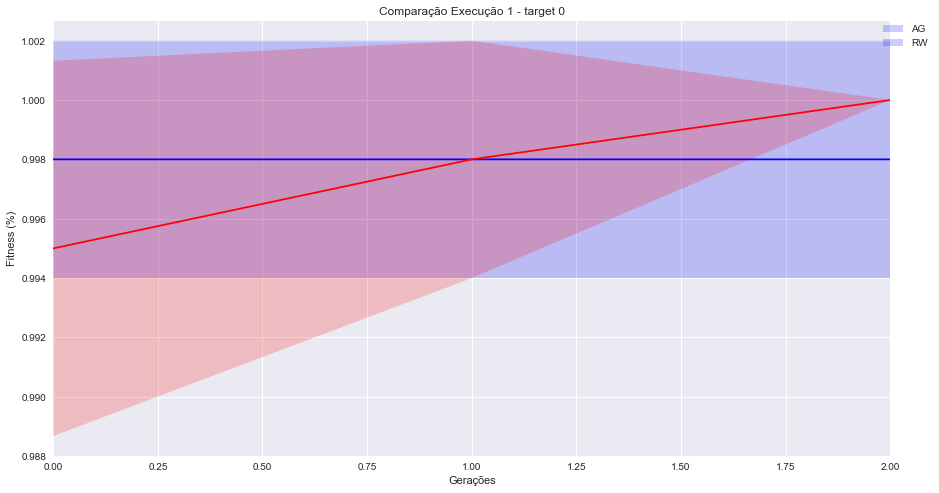

In [3]:
dados_iris = datasets.load_iris()

dados_iris = pd.DataFrame(data= np.c_[dados_iris['data'], dados_iris['target']],
                     columns= dados_iris['feature_names'] + ['target'])
   

tamanhoPopulacao = 100
execucoes = 5
maxGeracoes = 50
ring = 0.05 
pc = 0.75
pm = 0.01
dev = 0.4
classeAlvo = 0

#------Executando a primeira busca--------------
rwExec1 = RandomWalk(dados_iris,classeAlvo,tamanhoPopulacao,maxGeracoes,execucoes)
agExec1 = AlgoritmoGenetico(dados_iris,classeAlvo, tamanhoPopulacao, maxGeracoes,
                            pc, pm, dev, int(ring*tamanhoPopulacao), execucoes)

rwMedDev1 = calculaMediaDesvioAcertos(rwExec1.getFitByGenByExec())
agMedDev1 = calculaMediaDesvioAcertos(agExec1.getFitByGenByExec())

#----Gráfico de convergencia das execuções-----------

ax = sns.tsplot(agExec1.getFitByGenByExec(), color="blue", ci='sd',legend=True)
ax = sns.tsplot(rwExec1.getFitByGenByExec(), color="red", ci='sd',legend=True)

plt.xlabel('Gerações')
plt.ylabel('Fitness (%)')
plt.legend(['AG','RW'],loc='best',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.title("Comparação Execução 1 - target 0")
plt.show()

## Resultados - Experimento 2

Os seguintes valores foram utilizados nas variáveis dos algoritmos:
    
[Voltar ao Sumário](#Sumário)

O Tamanho da população é 50
Execuçao RW 1
Atingiu o máximo de gerações sem evoluir na geração 67, com fitness = 0.96

Regras
petal length (cm)>=2.0285443742979674
petal width (cm)<1.6038439387835952
target=1

Matriz de Confusão
[0, 0, 0]
[0, 48, 0]
[0, 4, 0]

Verdadeiros Positivos TP   -> 	 48
Falsos Positivos FP        -> 	 4
Verdadeiros Negativos TN   -> 	 96
Falsos Negativos FN        -> 	 2
Acuracia                   -> 	 0.96
Sensibilidade              -> 	 0.96
Especificidade             -> 	 0.96
Fitness                    -> 	 0.96
Execuçao RW 2
Atingiu o máximo de gerações sem evoluir na geração 117, com fitness = 0.95

Regras
sepal width (cm)<3.3015564769596653
petal length (cm)>=2.495100336116844
petal width (cm)<1.6251101688365772
target=1

Matriz de Confusão
[0, 0, 0]
[0, 47, 0]
[0, 4, 0]

Verdadeiros Positivos TP   -> 	 47
Falsos Positivos FP        -> 	 4
Verdadeiros Negativos TN   -> 	 96
Falsos Negativos FN        -> 	 3
Acuracia                   -> 	 0.953333333333
S

Fitness                    -> 	 0.965
Execuçao AG 7
Atingiu o máximo de gerações sem evoluir na geração 97, com fitness = 0.95

Regras
sepal width (cm)<4.436248834187917
petal length (cm)<4.906168606379072
petal width (cm)>=0.8842812126809143
target=1

Matriz de Confusão
[0, 0, 0]
[0, 48, 0]
[0, 6, 0]

Verdadeiros Positivos TP   -> 	 48
Falsos Positivos FP        -> 	 6
Verdadeiros Negativos TN   -> 	 94
Falsos Negativos FN        -> 	 2
Acuracia                   -> 	 0.946666666667
Sensibilidade              -> 	 0.96
Especificidade             -> 	 0.94
Fitness                    -> 	 0.95
Execuçao AG 8
Atingiu o máximo de gerações sem evoluir na geração 116, com fitness = 0.965

Regras
petal length (cm)>=2.8747104855523062
petal width (cm)<1.7451324815786116
target=1

Matriz de Confusão
[0, 0, 0]
[0, 49, 0]
[0, 5, 0]

Verdadeiros Positivos TP   -> 	 49
Falsos Positivos FP        -> 	 5
Verdadeiros Negativos TN   -> 	 95
Falsos Negativos FN        -> 	 1
Acuracia                   -

C:\Users\claud\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


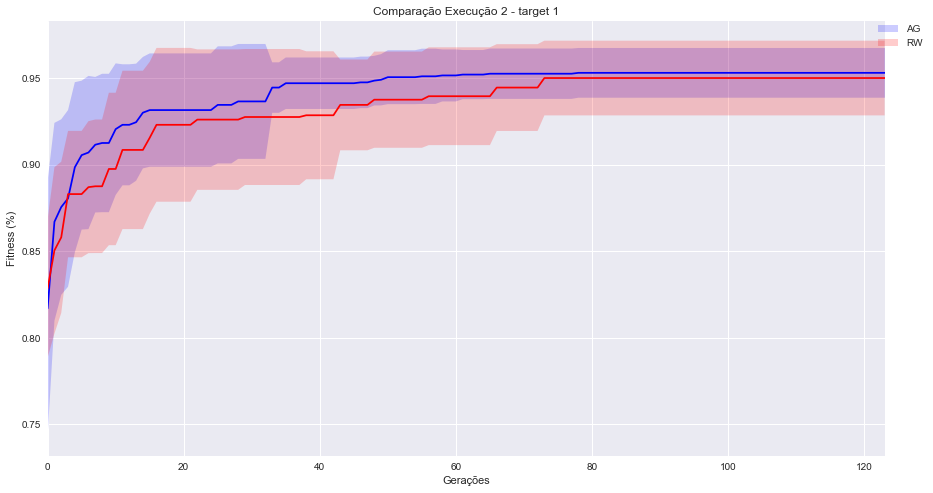

In [2]:
dados_iris = datasets.load_iris()

dados_iris = pd.DataFrame(data= np.c_[dados_iris['data'], dados_iris['target']],
                     columns= dados_iris['feature_names'] + ['target'])
   

tamanhoPopulacao = 50
execucoes = 10
maxGeracoes = 50
ring = 0.05 #em porcentagem | 0.1 = 10%
pc = 0.75
pm = 0.01
dev = 0.4
classeAlvo = 1

#------Executando a segunda busca--------------
rwExec2 = RandomWalk(dados_iris,classeAlvo,tamanhoPopulacao,maxGeracoes,execucoes)
agExec2 = AlgoritmoGenetico(dados_iris,classeAlvo, tamanhoPopulacao, maxGeracoes,
                            pc, pm, dev, int(ring*tamanhoPopulacao), execucoes)

rwMedDev2 = calculaMediaDesvioAcertos(rwExec2.getFitByGenByExec())
agMedDev2 = calculaMediaDesvioAcertos(agExec2.getFitByGenByExec())

#----Gráfico de convergencia das execuções-----------

ax = sns.tsplot(agExec2.getFitByGenByExec(), color="blue", ci='sd',legend=True)
ax = sns.tsplot(rwExec2.getFitByGenByExec(), color="red", ci='sd',legend=True)

#plt.yticks(range(50,104,5))

plt.xlabel('Gerações')
plt.ylabel('Fitness (%)')
plt.legend(['AG','RW'],loc='best',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.title("Comparação Execução 2 - target 1")
plt.show()

## Resultados - Experimento 3

Os seguintes valores foram utilizados nas variáveis dos algoritmos:
    
[Voltar ao Sumário](#Sumário)

In [ ]:
dados_iris = datasets.load_iris()

dados_iris = pd.DataFrame(data= np.c_[dados_iris['data'], dados_iris['target']],
                     columns= dados_iris['feature_names'] + ['target'])
   

tamanhoPopulacao = 1000
execucoes = 10
maxGeracoes = 50
ring = 0.05 #em porcentagem | 0.1 = 10%
pc = 0.75
pm = 0.01
dev = 0.4
classeAlvo = 2

#------Executando a terceira busca--------------
rwExec3 = RandomWalk(dados_iris,classeAlvo,tamanhoPopulacao,maxGeracoes,execucoes)
agExec3 = AlgoritmoGenetico(dados_iris,classeAlvo, tamanhoPopulacao, maxGeracoes,
                            pc, pm, dev, int(ring*tamanhoPopulacao), execucoes)

rwMedDev3 = calculaMediaDesvioAcertos(rwExec3.getFitByGenByExec())
agMedDev3 = calculaMediaDesvioAcertos(agExec3.getFitByGenByExec())

#----Gráfico de convergencia das execuções-----------

ax = sns.tsplot(agExec3.getFitByGenByExec(), color="blue", ci='sd',legend=True)
ax = sns.tsplot(rwExec3.getFitByGenByExec(), color="red", ci='sd',legend=True)

plt.xlabel('Gerações')
plt.ylabel('Fitness (%)')
plt.legend(['AG','RW'],loc='best',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.title("Comparação Execução 3 - target 2")
plt.show()

# Considerações Finais

O random walk consegue excelentes resultados por ser um conjunto de dados pequeno e com poucos atributos.

O AG também alcança bons resultados, porém com mais velocidade (menor número de gerações).

Puderam ser extraidas excelentes regras da base de dados apesa de ser necessário vários testes alterando os parâmetros  até conseguir atingir um bom desempenho.

[Voltar ao Sumário](#Sumário)